##  Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

## ED

<font  face=Times color=darkblue size=3>The basic idea is to construct the matrix of Hamiltonian and diagonalize it to get the eigenvalues and eigenvectors. <br><br> We choose the $S^z$ basis and use the bit representation. For example, for a N-spin chain, there are $2^N$ states and can be represented as: $$|0>=|\downarrow,\downarrow,...,\downarrow> (=00...0)$$ $$|1>=|\uparrow,\downarrow,...,\downarrow> (=00...1)$$ <br><br> To construct the matrix, we enumerate the states and $H_{ij}=<i|H|j>$. Just be careful that the pairs of spin raising/lowering opertors can flip the spins thus providing the off-diagonal elements, while the $S^z$ operators provide the diagonal elements.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

#### About String concatenation

In [20]:
# To show the process
a='0001'
b='1111'
c='22222'

In [22]:
print('a:',a)
print('b:',b)
print('c:',c)
print('bin(a):', bin(10))

a: 0001
b: 1111
c: 22222
bin(a): 0b1010


In [23]:
print('concatenation:a+b+c:',a+b+c)

concatenation:a+b+c: 0001111122222


#### Code

In [99]:
# set parameters
N=2
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))
z

'00'

In [100]:
# Matrix Construction
for a in range(dimension):
    for i in range(N-1):
        j=np.mod(i+1,N)
        state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
        l=len(state_chain)
#        print(state_chain)
        state_chain=z[0:N-l]+state_chain # make the length equal to N
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            if max(i,j)==N-1:
                if i>j:  #here we are doing the concatenation of string (you can try other methods)
                    state_chain=element_i+state_chain[1:N-1]+element_j
#                    print(state_chain)
                else:
                    state_chain=state_chain[0:i]+element_j+element_i
#                    print(state_chain)
            else:
                state_chain=state_chain[0:i]+element_j+element_i+state_chain[j+1:]
#            print(state_chain)
            b=int(state_chain,2)
            H[a,b]+=0.5

In [101]:
H

array([[ 0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.5 ,  0.  ],
       [ 0.  ,  0.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25]])

In [102]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates

In [103]:
# ground state energy
min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-0.7499999999999999,
 array([ 0.        ,  0.70710678, -0.70710678,  0.        ]))

In [104]:
energy_level=np.sort(eig_value)

Text(0.5, 1.0, 'Energy Level of Spin Chain')

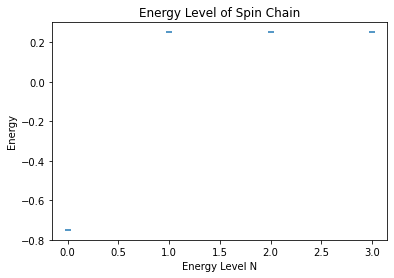

In [105]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

<font  face=Times color=darkblue size=3> Then we find the ground state by searching for the lowest energy.

### measurement

<font  face=Times color=darkblue size=3> To measure observables, we take $S^z$ as an example. The expectation value of the n:th eigenstate is $$<n|S^z|n>=[U^{T*}S^zU]$$ where U is the matrix whose columns are the eigenvectors. <br> To construct the matrix of the operator, the method is quite similar to that of hamiltonian, but there is only diagonal elements: $S^z_{aa}=+\frac{1}{2}n-\frac{1}{2}(N-n)$.

In [106]:
matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))

In [107]:
mat_Sz=np.zeros((dimension,dimension))

In [108]:
##construct Sz matrix
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

In [109]:
mat_Sz

array([[-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [110]:
# find the index of the ground state
ind_ground=np.argmin(eig_value)

In [111]:
np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[ind_ground,ind_ground]

0.0

<font  face=Times color=darkblue size=3> Now, we see that for the antiferromagnet, the $S^z$ is generally equal to $0$ at ground state if N is even. <br><br> You can check the value of $S_z$ if N is odd.